<h1> <center> Grid Search vs. Gradient Descent </center> </h1>
<h4> <center> Chien-Lan Hsueh </center> </h4>

# Table of contents
1. [Introduction](#overallgoal)
2. [Dataset](#dataset)
3. [Methodology](#methodology)
    1. [Part 0 : Load Data and define the loss function](#0)
    2. [Part 1 : Exploratory Data Analysis](#1)
    3. [Part 2 : Prediction Algorithms](#2)
        1. [Part 2.1 : Prediction using Grid Search](#GS)
        2. [Part 2.2 : Prediction using Gradient Descent](#GD)
4. [Conclusion](#conclusion)


## Introduction <a name="overallgoal"></a>
This project is to analyz a dataset for selling prices of used motorcycles. Exploratory data analysis (EDA) is conducted and the selling prices are predicted using algorithms like Grid Search and Gradient Descent which are built from scratch.

## Dataset <a name="dataset"></a>
The dataset is on motorcycle sales. The original dataset could be find on this [link](https://www.kaggle.com/nehalbirla/motorcycle-dataset?select=BIKE+DETAILS.csv). We have 6 predictor variables that will help us in determining the target variable : Selling Price of a motorcycle.

## Methodology <a name="methodology"></a>
The methodology adapted for the completion of the project was to split the project into four tasks. The tasks were as follows : 
- Part 0 : Load Data and define the loss function.
- Part 1 : Exploratory Data Analysis 
- Part 2.1 : Prediction Using Grid Search
- Part 2.2 : Prediction Using Gradient Descent  

Let us look at the content and code for the successfully completion of each part.

### Part 0 : Load Data and define the loss function <a name="0"></a>
This notebook contained shared (common) codes for:
- Import modules
- Read in data and prep dataframe
- Define the loss function

The goal for the sucessful completion of this part were as follows : 
- Modules imported successfully 
- Data read and prepped as a pandas dataframe 
- Loss function defined and tested

#### Import the modules

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math

- `Numpy` - `NumPy` stands for Numerical Python and it is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. The advantage of using `NumPy` arrays over lists is that `NumPy` aims to provide an array object that is up to 50x faster than traditional Python lists.    

- Pandas - `pandas` is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.  


- Scipy - is an open-source software for mathematics, science, and engineering i.e scientific computation. It includes modules for statistics, optimization, integration, linear algebra, Fourier transforms, signal and image processing, ODE solvers, and more. `SciPy` is built to work with `NumPy` arrays, and provides many user-friendly and efficient numerical routines, such as routines for numerical integration and optimization. Together, they run on all popular operating systems, are quick to install, and are free of charge.


- Matplotlib - `Matplotlib` is a plotting library for the Python programming language. It provides an object-oriented API for embedding plots into applications. It is a comprehensive library for creating static, animated, and interactive visualizations in Python.  


- Seaborn - `Seaborn` is a Python visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive statistical graphics.

- Math - `math` is a module that provides access to the mathematical functions.

#### Read in data and prep dataframe 

In [2]:
# read from a local CSV with row numbers as index
df = pd.read_csv("bikeDetails.csv")
# printing the first few rows of the dataframe
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [3]:
# printing the columns of the dataframe 
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

There are 7 columns in the dataset. The 6 explanatory variables are : 
- name of the motorbike 
- year 
- seller type 
- owner 
- kilometers driven 
- ex showroom price  

The target variable is :
- selling price

In [4]:
# getting the datatypes of each column
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

#### Data Preparation

In [5]:
# convert the variables into proper data types
# convert seller_type to categorical variable
df["seller_type"] = df["seller_type"].astype("category")

# get the number of owners numeric and save it in a new variable
df["n_owner"] = df["owner"].str[:1].astype(int)

# keeping the owner variable but convert it to categorical variable
df["owner"] = df["owner"].astype("category")

In [6]:
df.dtypes

name                   object
selling_price           int64
year                    int64
seller_type          category
owner                category
km_driven               int64
ex_showroom_price     float64
n_owner                 int32
dtype: object

In [7]:
# final table-level summarisation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   category
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
 7   n_owner            1061 non-null   int32   
dtypes: category(2), float64(1), int32(1), int64(3), object(1)
memory usage: 48.1+ KB


### Part 1 : Exploratory Data Analysis <a name="1"></a>

Performing Exploratory Data Analysis to perform initial investigations on data so as to discover patterns, to spot anomalies and test hypothesis with the help of summary statistics and graphical representations. This notebook explores the initial exploratory questions one might have regarding the dataset. 

#### Data Summary

In [8]:
# shape of the dataset
df.shape

(1061, 8)

There are 1061 rows and 7 columns

In [9]:
# checking for null values
df.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
n_owner                0
dtype: int64

Not every bike model has an Ex Showroom price attached.

In [10]:
# Numerical summaries 
df.groupby(['seller_type'])['selling_price'].mean()

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64

Individual Seller have a greater mean selling price than Dealers.

In [11]:
# Numerical summaries 
grouped = df.groupby(['name'])['selling_price'].mean()
grouped.sort_values(ascending = False)

name
Suzuki GSX S750                   760000.0
Harley-Davidson Street Bob        750000.0
Yamaha YZF R3                     365000.0
Kawasaki Ninja 650 [2018-2019]    362500.0
Harley-Davidson Street 750        330000.0
                                    ...   
Hero Honda Street Smart            10000.0
TVS Centra                         10000.0
Hero Honda CD100SS                 10000.0
Hero Honda Passion                  9000.0
TVS Excel                           5000.0
Name: selling_price, Length: 279, dtype: float64

The top 3 bikes with the highest mean selling price are : 
- Suzuki GSX S750
- Harley-Davidson Street Bob
- Yamaha YZF R3

In [12]:
# checking for unique values in each column
df.nunique()

name                 279
selling_price        130
year                  28
seller_type            2
owner                  4
km_driven            304
ex_showroom_price    230
n_owner                4
dtype: int64

In [13]:
# Exploring the various columns
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'n_owner'],
      dtype='object')

In [14]:
# Data distribution across the categorical columns
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

We see that the distribution of Sellers is not balanced. We have many more individual sellers than dealers.

In [15]:
print(df['owner'].value_counts())

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64


The data is highest for first owner and very few data is available for fourth owner.

#### Data distribution across categorical columns  

In [16]:
# set the plot style
plt.style.use('ggplot')

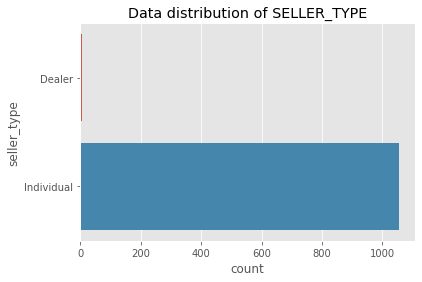

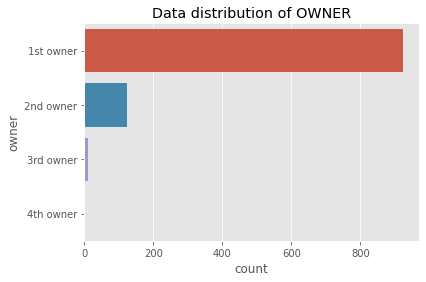

In [17]:
#displaying data distribution across categorical variables 
for col in df.select_dtypes(include='category'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.title(f"Data distribution of {col.upper()}")
        plt.show()

#### Data distribution across numerical variables

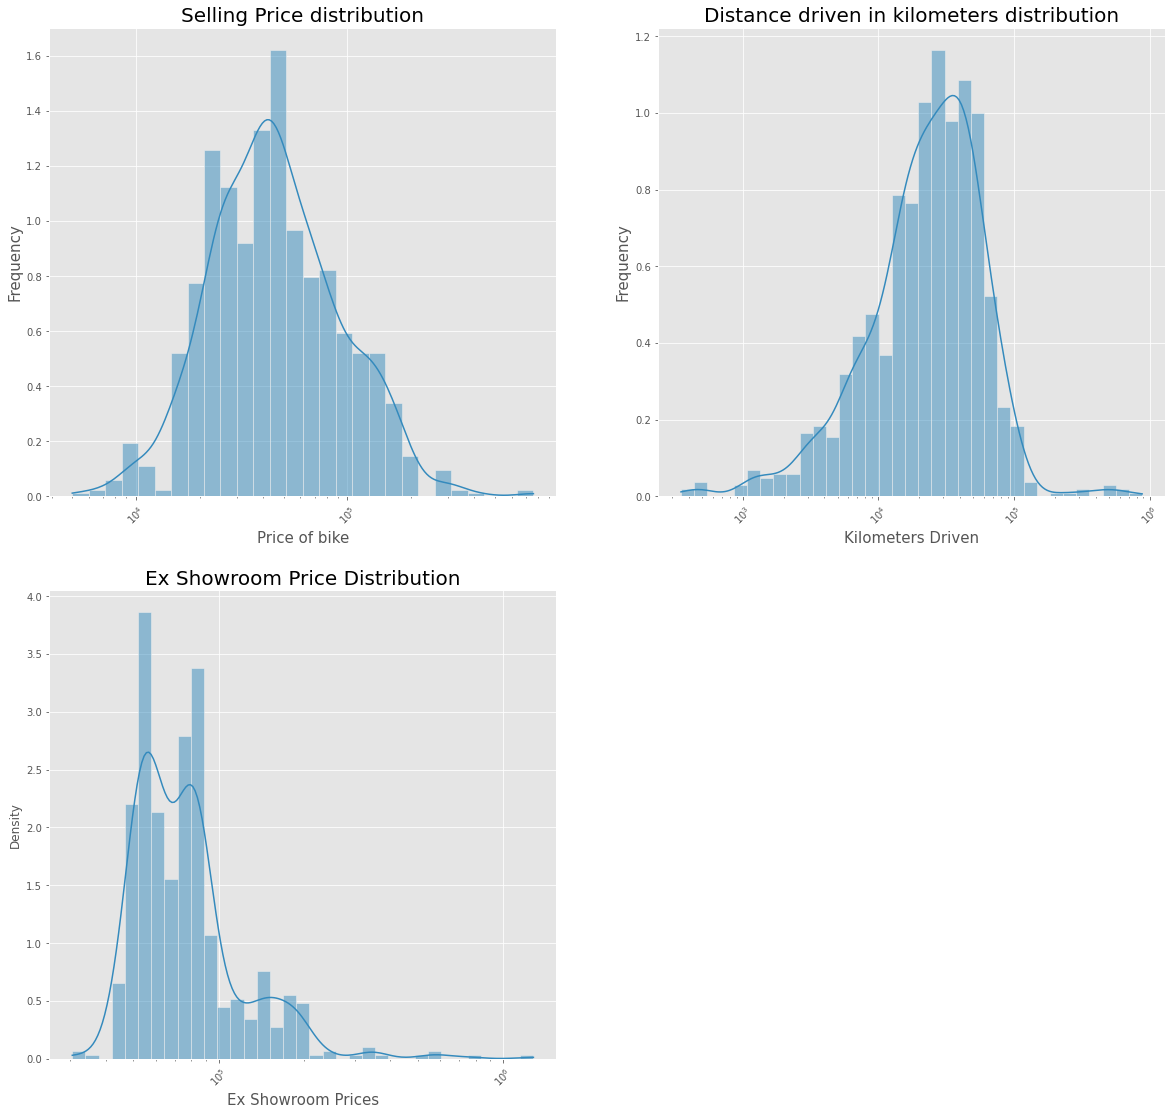

In [18]:
# plot distributions across numerical variables
plt.figure(figsize=(20,50))

# subplot - Selling Price distribution
plt.subplot(5,2,1)
sns.histplot(df['selling_price'], kde=True, stat='density', log_scale=True)
plt.xticks(rotation = 45)
plt.xlabel("Price of bike",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Selling Price distribution",fontsize = 20)

# subplot - Distance driven in kilometers distribution
plt.subplot(5,2,2)
sns.histplot(df['km_driven'], kde=True, stat='density', log_scale=True)
plt.xticks(rotation = 45)
plt.xlabel("Kilometers Driven",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Distance driven in kilometers distribution",fontsize = 20)

# subplot - Ex Showroom Price Distribution
plt.subplot(5,2,3)
sns.histplot(df['ex_showroom_price'], kde=True, stat='density', log_scale=True)
plt.xticks(rotation = 45)
plt.xlabel("Ex Showroom Prices",fontsize = 15)
plt.title("Ex Showroom Price Distribution",fontsize = 20)

plt.show()
plt.close()

#### Correlation Plot

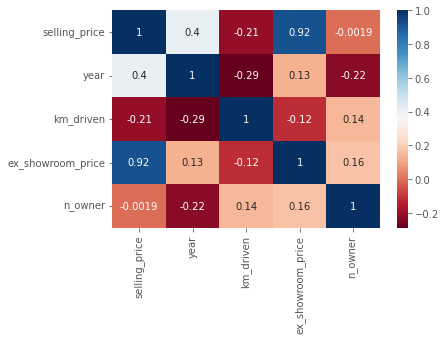

In [19]:
# correlation plot
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

We see that Selling price of the bike has the maximum positive correlation with Ex Showroom Price. The selling price of a motorcycle is highly dependent on the motorcycle's ex showroom price.

#### Scatterplot across all columns

Text(0.5, 0.98, 'Scatterplots across all columns')

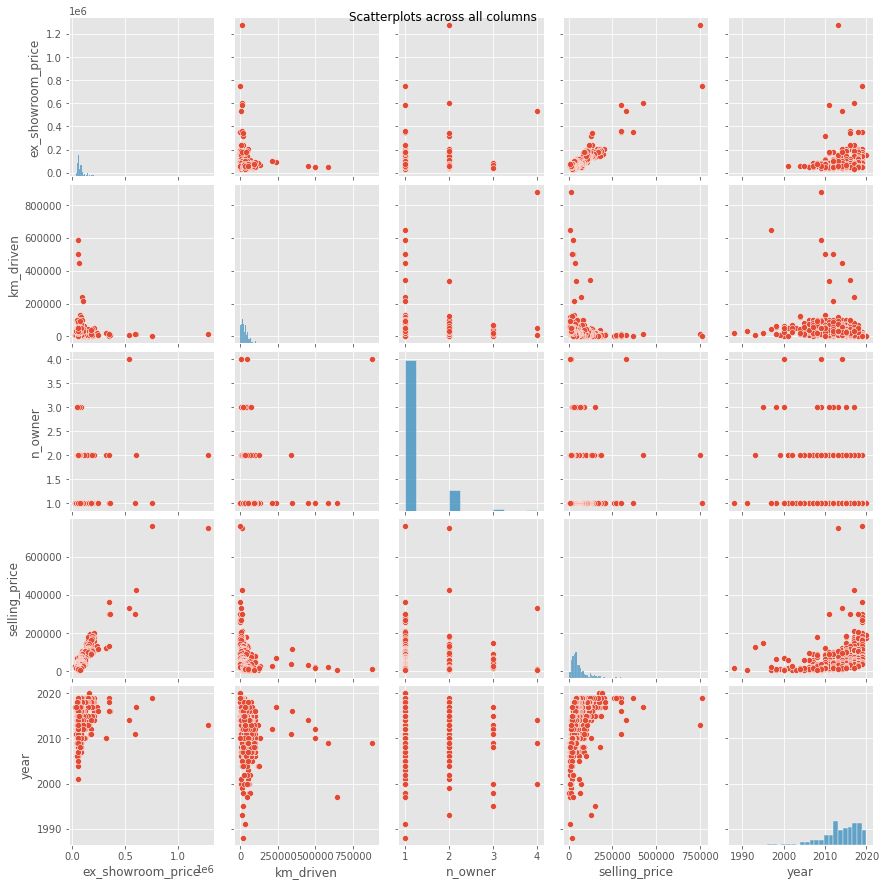

In [20]:
# scatter plots of all the combination of columns
pairplot1 = sns.pairplot(df.loc[:, df.columns.difference(['nowner'])])
pairplot1.fig.suptitle("Scatterplots across all columns")

Inferences :
- Maximum cars were sold in between 2010 and 2020. 
- Kilometers driven has a slight negative correlation with selling price. In some instances, the lower the kilometers driven for a bike, we notice a higher selling price. 
- Ex showroom price and selling price have direct positive correlation. We notice that for a bike with lower ex showroom price, a lower selling price too. 

#### Boxplot across numerical columns

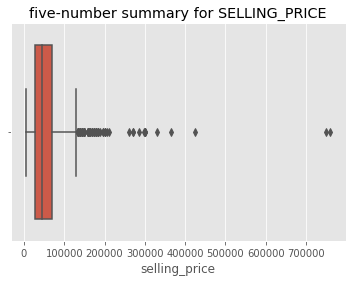

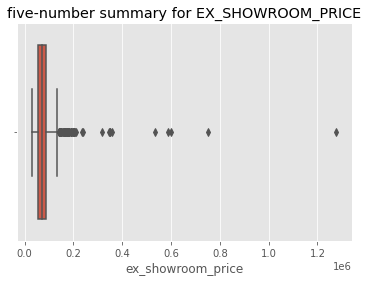

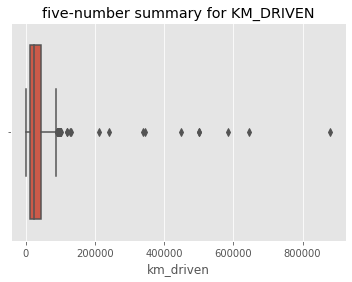

In [21]:
# boxplot of numerical columns
num_cols = ['selling_price','ex_showroom_price','km_driven']
for i in num_cols :
    sns.boxplot(x=i, data=df)
    plt.title(f"five-number summary for {i.upper()}")
    plt.show()

In [22]:
# numeric summaries of selling_price by seller_type
df.groupby("seller_type")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,6.0,46666.666667,25734.542286,15000.0,28250.0,44000.0,66500.0,80000.0
Individual,1055.0,59711.923223,56427.961672,5000.0,28000.0,45000.0,70000.0,760000.0


In [23]:
# numeric summaries of selling_price by number of owners
df.groupby("owner")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
1st owner,924.0,60022.813853,51542.569711,5000.0,30000.0,45000.0,74250.0,760000.0
2nd owner,123.0,55666.658537,81671.923395,6000.0,25000.0,32000.0,57500.0,750000.0
3rd owner,11.0,55727.272727,38385.129697,20000.0,27500.0,45000.0,67500.0,150000.0
4th owner,3.0,118333.333333,183325.757419,10000.0,12500.0,15000.0,172500.0,330000.0


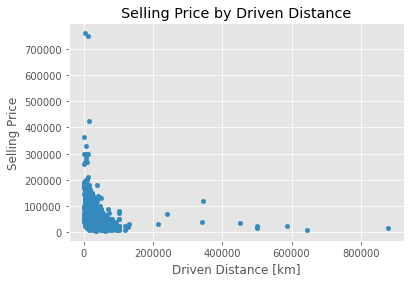

In [24]:
# graphic summery - scatter plot of selling price by driven distance
df.plot.scatter(x="km_driven", y="selling_price")
plt.xlabel("Driven Distance [km]")
plt.ylabel("Selling Price")
plt.title("Selling Price by Driven Distance")
plt.show()

Most of the data is concentrated between 0-150000 km of distance driven. The selling price of a couple cars that have low distance driven has a really high selling price as high as 700000. Cars that have reall high distance driven greater than 200000 has a really low selling price.

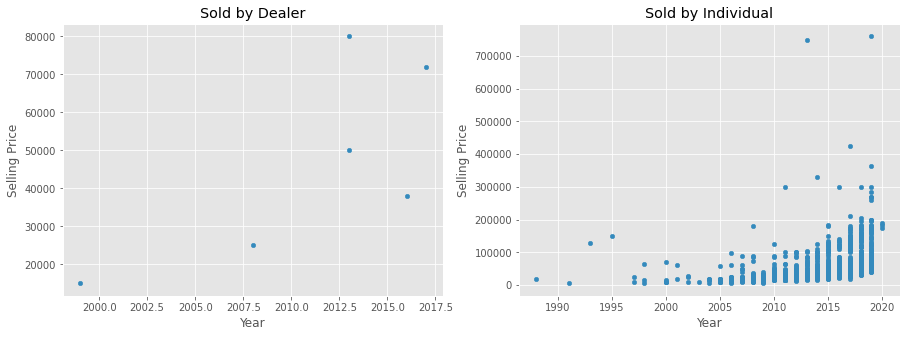

In [25]:
# graphic summery - scatter plot of selling price by seller type
df_dealer = df[df["seller_type"] == "Dealer"]
df_individual = df[df["seller_type"] == "Individual"]

# create 1x2 plots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

# first scatter plot
plt.subplot(1, 2, 1) 
df_dealer.plot.scatter(ax=ax[0], x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Sold by Dealer")

# second scatter plot
plt.subplot(1, 2, 2) 
df_individual.plot.scatter(ax=ax[1], x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Sold by Individual")

plt.show()

([<matplotlib.axis.XTick at 0x1d9e2940b50>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

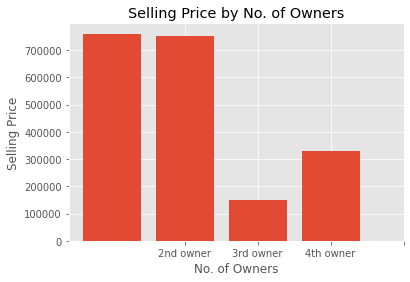

In [26]:
# graphic summery - scatter plot of selling price by driven distance
plt.bar(x="owner", height="selling_price", data = df)
plt.xlabel("No. of Owners")
plt.ylabel("Selling Price")
plt.title("Selling Price by No. of Owners")
plt.xticks(np.arange(1, 5, step=1))

Bikes with first and second owner has the highest selling price. As the bike ends up with more number of owners, the selling price decreases significantly.

In [27]:
# Contingency table: owner by selling prices (ranges)
df["price_range"] = pd.cut(df.selling_price, bins=[0, 10000, 100000, 1000000])
pd.crosstab(df.owner, df.price_range, margins = True) 

price_range,"(0, 10000]","(10000, 100000]","(100000, 1000000]",All
owner,,,,
1st owner,19,775,130,924
2nd owner,4,105,14,123
3rd owner,0,10,1,11
4th owner,1,1,1,3
All,24,891,146,1061


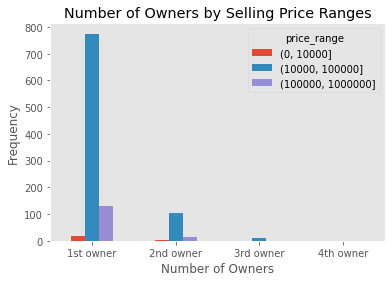

In [28]:
# stacked bar plot: owner by selling prices (ranges)
pd.crosstab(df.owner, df.price_range).plot.bar()
plt.xlabel("Number of Owners")
plt.ylabel("Frequency")
plt.title("Number of Owners by Selling Price Ranges")
plt.xticks(rotation = 0)
plt.grid()

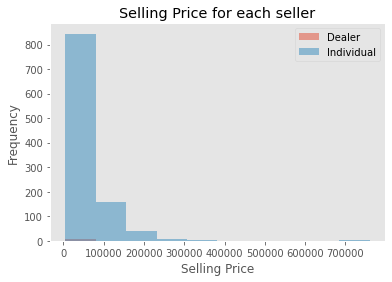

In [29]:
# Plotting Selling Price categorised by Seller Type 
dealer = df.loc[df.seller_type == "Dealer", "selling_price"]
ind = df.loc[df.seller_type == "Individual", "selling_price"]
age_hist_df = pd.DataFrame([pd.Series(dealer), pd.Series(ind)]).transpose()
age_hist_df.columns = ["Dealer", "Individual"]
age_hist_df.plot.hist(alpha = 0.5)
plt.xlabel("Selling Price")
plt.title("Selling Price for each seller")
plt.grid()

Text(0.5, 0.98, '')

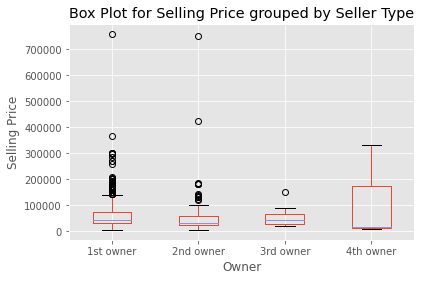

In [30]:
# Plotting Selling Price grouped by Owner
df.boxplot(column = "selling_price", by = "owner")
plt.title('Box Plot for Selling Price grouped by Seller Type')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.suptitle('')

### Part 2 : Prediction Algorithms <a name="2"></a>
We want to be able to predict a value of selling_price for a new motorcycle. In this project, we use a linear model and want to find the best values of model parameters that minimizes the loss function - RMSE (smaller loss means better prediction - closer to all the points). Once we have those, we then can use them for predictions.

#### Defining the loss function 

Loss function is a way to measure how your algorithm is performing. The loss function is the function that computes the distance between the current output of the algorithm and the expected output. RMSE or Root Mean Square Error is a commonly used Loss Function. Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

Define the loss function - RMSE
The squared error loss for a data point (call it $y_1$) and a prediction (c) is :  

$$L(y_1, c) = (y_1 - c)^2$$

For a given set of data $(y_1,...,y_n$ - selling price values), we could consider the mean squared error given by :  

$$RMSE(c) = Root \; Mean \; Squared \; Error = \sqrt{\frac{1}{n}\sum_i^nL(y_i,c)}$$

Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data.  

This tells us heuristically that RMSE can be thought of as some kind of (normalized) distance between the vector of predicted values and the vector of observed values.

In [31]:
# define the loss function (RMSE)
def loss(obs, pred):
    '''Calculate the loss function - RMSE.
        Args:
            obs: the observed value from the dataset
            pred: the predicted values after applying the algorithm
        Returns:
            the root mean square error
    '''
    # in case pred is a number instead of a list, make it a list with the same length of the obs list
    if type(pred) == int or type(pred) == float:
        pred = [pred] * len(obs)
        pass
    
    # calculate the rmse
    return (np.mean(np.square(np.subtract(obs, pred)))) ** 0.5

#### Numerical methods used to search the optimal values

Numerical methods used to find the optimal model parameters are :
1. Grid search
2. Gradient descent

#### Part 2.1 : Prediction Using Grid Search <a name="GS"></a>
Grid search, a parameter sweep, is simply an exhaustive searching.

##### Define helper functions
Before we start the grid search, it will be convenient if we first define the grid search function to search the fitting parameters which gives the minimum of rmse.

In [32]:
# define grid search function
def grid_search(obs, var_x, rng_b0, rng_b1, n_grid):
    '''Defining the grid search function.
        Args:
            obs: observations (pandas series)
            var_x: variable (regressor) used for prediction (pandas series)
            rng_b0: range of initial b0 grid (list of upper and lower bounds)
            rng_b1: range of initial b1 grid (list of upper and lower bounds)
            n_grid: number of grids
        Returns:
            b0:  intercept 
            b1: slope
            b0_step: step taken for intercept 
            b1_step: step taken for slope
    '''

    # set up grid axes and get the step sizes
    lst_b0, b0_step = np.linspace(rng_b0[0], rng_b0[1], n_grid + 1, retstep = True)
    lst_b1, b1_step = np.linspace(rng_b1[0], rng_b1[1], n_grid + 1, retstep = True)
    
    # remove duplicated stops
    lst_b0 = list(set(lst_b0))
    lst_b1 = list(set(lst_b1))
    
    # generate the search grid by expanding axes
    grid = [(b0, b1) for b0 in lst_b0 for b1 in lst_b1]
    
    # calculate rmse for every point in the search grid
    lst_rmse = [loss(obs, b0 + b1 * np.array(var_x)) for b0, b1 in grid]
    
    # find optimal b0 and b1
    idx = lst_rmse.index(np.min(lst_rmse))
    b0, b1 = grid[idx] 
    print(f"index: {idx}, b0 = {b0}, b1 = {b1}")
    print(f"step size: b0 = {b0_step}, b1 = {b1_step}")
    
    return b0, b1, b0_step, b1_step

##### Task 1: Just $y$
The model we will first try is: $\hat{y}_i = \beta_0 + \beta_1 x_i$ with $\beta_1 = 0$.

In this case, we only use $\beta_0$ to predict the selling price. Therefore, we can choose the initial range of the search grid for $\beta_0$ to be the range of the selling prices. The search grid for $\beta_1$ is zero. We will do 1000 grids in each of our search.

- Initial range for $\beta_0$: The minimum and maximum of the selling price
- Initial range for $\beta_1$: The initial range is 0 (we are not using it in this model)
- Number of grids: 1000

The 1st grid search:

In [33]:
# set up initial parameters
## rng_b0 = [lower bound, upper bound] of initial b0
## rng_b1 = [lower bound, upper bound] of initial b1
rng_b0 = [df.selling_price.min(), df.selling_price.max()]
rng_b1 = [0, 0]
n_grid = 1000

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 985, b0 = 59360.0, b1 = 0.0
step size: b0 = 755.0, b1 = 0.0


We found that when $\beta_0$ is 59360.0, we have the minimal rmse.

The step size for $\beta_0$ is 755.0 so we can narrow down the search grid and do another grid search.

The 2nd grid search:

In [34]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 1000

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 162, b0 = 59637.84, b1 = 0.0
step size: b0 = 1.51, b1 = 0.0


We found that when $\beta_0$ is 59637.84, we have the minimal rmse.

The step size for $\beta_0$ is 1.51 so we can narrow down the search grid and do another grid search.

The 3rd grid search:

In [35]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 1000

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 689, b0 = 59638.15106, b1 = 0.0
step size: b0 = 0.0030200000000040745, b1 = 0.0


Now the step size is small and we have the precision to the 1st decimal point:
- $\beta_0 = 59638.157$ with step size $0.003$

The value of $\beta_0$ is close to the mean of the selling price $9638.157$ as expected.

This means that when the motorcycle is driven 0 kilometers then the price of the motorcycle will be $9638.157$.

##### Task 2: Using $y$ and another numeric variable $x$
Now we will fit the model $\hat{y}_i = \beta_0 + \beta_1 x_i$.

To determine the inital ranges of the search grids for $\beta_0$ and $\beta_1$, recall the scatter plot:

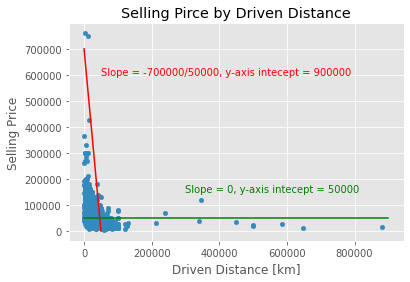

In [36]:
# graphic summery - scatter plot of selling price by driven distance
df.plot.scatter(x="km_driven", y="selling_price")
plt.xlabel("Driven Distance [km]")
plt.ylabel("Selling Price")
plt.title("Selling Pirce by Driven Distance")

# add two estimated fitting lines for low- and high-mileage data points
plt.plot([0, 50000], [700000, 0], c = "red")
plt.plot([0, 900000], [50000, 50000], c = "green")

# annotate the estimated slopes and y-axis intercepts
plt.annotate("Slope = -700000/50000, y-axis intecept = 900000", xy =(50000, 600000), c = "red")
plt.annotate("Slope = 0, y-axis intecept = 50000", xy =(300000, 150000), c = "green")

plt.show()

With low mileages, we can draw a line (red) with a negative slope (≈-700000/50000) and a large positive y-axis intercept (≈1000000). Similarly, with high mileages (right), we can draw a horizontal line (green) with a zero slope (≈0) and a small positive y-axis intercept (≈50000). A best fitting line has a slope and y-axis intercept between these two lines' slopes and y-axis intercepts. 

Therefore, we can use these two lines to estimate the lower and upper bounds of the slope $\beta_1$ and the y-axis intercept $\beta_0$, and use them as the inital ranges of our search grids.

- Initial range for $\beta_0$: [50000, 1000000]
- Initial range for $\beta_1$: [-700000/50000, 0]
- Number of grids: 100

The 1st grid search:

In [37]:
# set up initial parameters and precision
## rng_b0 = [lower bound, upper bound] of initial b0
## rng_b1 = [lower bound, upper bound] of initial b1
rng_b0 = [50000, 1000000]
rng_b1 = [-700000/50000, 0]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 7883, b0 = 69000.0, b1 = -0.27999999999999936
step size: b0 = 9500.0, b1 = 0.14


We found that when $\beta_0$ is 69000.0 and $\beta_1$ is -0.28, we have the minimal rmse.

The step sizes for both $\beta_0$ and $\beta_1$ are quite big. Therefore, we can narrow down the search grid and do another grid search.

The 2nd grid search:

In [38]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 1677, b0 = 67670.0, b1 = -0.23239999999999936
step size: b0 = 190.0, b1 = 0.0028000000000000004


We found that when $\beta_0$ is 67670.0 and $\beta_1$ is -0.232, we have the minimal rmse.

The step size for $\beta_1$ is small but for $\beta_0$, it is quite big. Therefore, we can narrow down the search grid and do another grid search.

The 3rd grid search:

In [39]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 904, b0 = 67616.8, b1 = -0.23223199999999936
step size: b0 = 3.8, b1 = 5.599999999999994e-05


We found that when $\beta_0$ is 67616.8 and $\beta_1$ is -0.232, we have the minimal rmse.

The step size for $\beta_0$ is 3.8. To get precision to the decimal point, we can narrow down the search grid and do another grid search.

The 4th grid search:

In [40]:
# set up initial parameters
rng_b0 = [b0 - b0_step, b0 + b0_step]
rng_b1 = [b1 - b1_step, b1 + b1_step]
n_grid = 100

# perform grid search
b0, b1, b0_step, b1_step = grid_search(df.selling_price, df.km_driven, rng_b0, rng_b1, n_grid)

index: 7680, b0 = 67618.092, b1 = -0.23224543999999936
step size: b0 = 0.0760000000000582, b1 = 1.1200000000000098e-06


At last, both the step sizes are small and we have the precision to the 1st decimal point:
- $\beta_0 = 67618.092$ 
- $\beta_1 = -0.232$

i.e when there is a unit change in kilometer driven then the selling price increases by $\$67618.092$.

And these agree well with the simple linear regression:

In [41]:
# fit a simple linear regression model for comparison
slope, intercept, *_ = stats.linregress(df.km_driven, df.selling_price)
print(f"intercept (b0) = {round(intercept,3)}, slope (b1) = {round(slope,3)}")

intercept (b0) = 67618.072, slope (b1) = -0.232


##### Task 3: Predict Selling Prices

In [42]:
# Use the model to predict the selling prices for the specified driven distances
[round(b0 + b1*x,3) for x in [10000, 25000, 35000]]

[65295.638, 61811.956, 59489.502]

- The predicted selling price for 10000 km driven is 65295.638.
- The predicted selling price for 25000 km driven is 61811.956.
- The predicted selling price for 35000 km driven is 59489.502.

#### Part 2.2 : Prediction Using Gradient Descent <a name="GD"></a>
Gradient descent is a first-order iterative algorithm to find a local minimum of a function.

##### Define helper functions
Before we start the gradient descent, it will be convenient if we first define the following functions:
1. The slope function to calculate the slope of the loss function
2. The gradient descent function to search the optimal parameters

In [43]:
# define function to calculate a slope of the loss function
def slope(obs, var_x, vec_b, vec_delta):
    '''calculate a slope of the loss function.
        Args:
            obs: observations (pandas series)
            var_x: variable (regressor) used for prediction (pandas series)
            vec_b: parameter vector of the starting point (list of b0 and b1)
            vec_delta: delta of parameter vector (list of steps for b0 and b1)
        Returns:
            rate
    '''
    
    # distance between two points (current b and new b)
    dist = np.linalg.norm(vec_delta)
    
    if dist == 0:
        rate = 0
    else:             
        # starting point
        x0 = vec_b[0] + vec_b[1] * np.array(var_x)
        y0 = loss(obs, x0)
        
        # end point
        vec_b_new = np.add(vec_b, vec_delta)
        x1 = vec_b_new[0] + vec_b_new[1] * np.array(var_x)
        y1 = loss(obs, x1)              
        
        # the change rate (slope)
        rate = (y1 - y0)/dist
        pass
    
    return rate

In [44]:
# define gradient descent function
def GD(obs, var_x, lst_b0, lst_b1, tolerance = 0.001, max_iter = 2000):
    '''calculate parameter values using gradient descent algorithm.
        Args:
            obs: observations (pandas series)
            var_x: variable (regressor) used for prediction (pandas series)
            lst_b1: initial b1 and its step size (list of b1 and delat_b1)g point (list of b0 and b1)
            tolerance: the search ending criteria 
            max_iter: maximum iterations allowed
        Returns:
            rate
    '''
    
    # initialize a list to save seach history
    hist = []
    
    # initialize the starting point and distance
    vec_b = [lst_b0[0], lst_b1[0]]
    delta_b0, delta_b1 = np.abs(lst_b0[1]), np.abs(lst_b1[1])
    dist = tolerance  
    
    for i in range(max_iter):
        # along b0 axis
        slope_b0 = slope(obs, var_x, vec_b, [tolerance, 0])   
        b0_new = vec_b[0] - slope_b0 * delta_b0
        
        # along b1 axis
        slope_b1 = slope(obs, var_x, vec_b, [0, tolerance**2])        
        b1_new = vec_b[1] - slope_b1 * delta_b1  
    
        # distance
        dist = np.linalg.norm(np.subtract(vec_b, [b0_new, b1_new]))
        
        # update b0, b1 and append it to the search history
        vec_b = [b0_new, b1_new]
        hist.append(vec_b)
        
        # exit the loop if the results meets the requirement
        if dist < tolerance:
            break
        pass  
    
    # return the search history of [b0, b1]
    return hist

##### Task 1: Just $y$
The model we will first try is: $\hat{y}_i = \beta_0 + \beta_1 x_i$ with $\beta_1 = 0$.

In this case, we only use $\beta_0$ to predict the selling price. 
- Initial values for $\beta_0$: In order to show our algorithm works, we arbitrarily choose the initial value 0 and step size of 1000. 
- Initial values for $\beta_1$: The initial value is 0 (we are not using it in this model) and set the step size to 0 so that we are not change its value.

In [45]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 0]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

789 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[59638.08612432331, 0.0],
 [59638.08728120057, 0.0],
 [59638.08841624996, 0.0],
 [59638.08952947147, 0.0],
 [59638.09062814107, 0.0],
 [59638.0917049828, 0.0],
 [59638.09276727261, 0.0],
 [59638.09380773455, 0.0],
 [59638.094826368615, 0.0],
 [59638.09582317481, 0.0]]

After 788 iterations, we get a convergent result. 
- $\beta_0 = 59637.971$

This is close to the mean of the selling price $59638.152 as expected.

##### Task 2: Using $y$ and another numeric variable $x$
Now we will fit the model $\hat{y}_i = \beta_0 + \beta_1 x_i$.

In this case, we only use $\beta_0$ to predict the selling price. 
- Initial values for $\beta_0$: We arbitarily choose the initial value 0 and step size of 1000. 
- Initial values for $\beta_1$: 

Attempt 1:

In [46]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

2000 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811]]

The iteration number reaches the maximum setting and we don't get convergent result.

From the search history, the values of [$\beta_0$, $\beta_1$] change between two points ([605, -44074329] and [1093, 17937388]). This implies at least one of the step sizes we used is too big. 

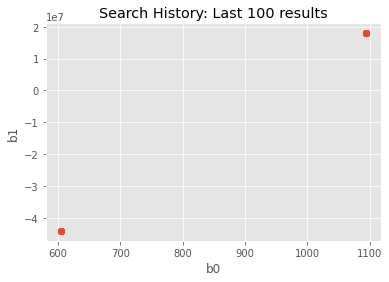

In [47]:
# plot the search history
x, y = np.array(hist[-100:]).T
plt.scatter(x, y, )
plt.title("Search History: Last 100 results")
plt.xlabel("b0")
plt.ylabel("b1")

plt.show()

Since, in the Task 1, we can get a convergent result with step size 1000 for $\beta_0$, we will try to use a smaller step size (1000 time smaller) for $\beta_1$ in our next attempt.

Attempt 2:

In [48]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000 / 1000]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

2000 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998]]

The iteration number reaches the maximum setting and we don't get convergent result.

From the search history, the values of [$\beta_0$, $\beta_1$] change between two points. This implies at least one of the step sizes we used is too big. 

We will try to use a smaller step size (1000 time smaller again) for $\beta_1$ in our next attempt.

Attempt 3:

In [49]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000 / 1000**2]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

2000 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[35518.29530624673, 30.961704571382143],
 [34975.9177188389, -30.99899050721433],
 [35541.636345442384, 30.96180818101857],
 [34999.250376131386, -30.998895977973007],
 [35564.96085366234, 30.961911324993707],
 [35022.56626961753, -30.998802147223614],
 [35588.26836524531, 30.96201283915434],
 [35045.86493363604, -30.998710411950015],
 [35611.55911302194, 30.96211295633111],
 [35069.14706667885, -30.998619375168346]]

The iteration number reaches the maximum setting and we don't get convergent result.

From the search history, the values of [$\beta_0$, $\beta_1$] change between two points. This implies at least one of the step sizes we used is too big. 

We will try to use a smaller step size (1000 time smaller again) for $\beta_1$ in our next attempt.

Attempt 4:

In [50]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000 / 1000 ** 3]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

1187 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[67618.00127424067, -0.23224530801235233],
 [67618.00236563431, -0.23224531971936813],
 [67618.00344247604, -0.23224533128086478],
 [67618.0045120418, -0.2322453427113942],
 [67618.00556705566, -0.2322453540036804],
 [67618.0066075176, -0.2322453651795513],
 [67618.00764070358, -0.23224537620990304],
 [67618.00865933765, -0.23224538712383946],
 [67618.0096634198, -0.23224539790680865],
 [67618.01066022599, -0.23224540856608655]]

After 1186 iterations, we get convergent results:
- $\beta_0 = 67618.012$
- $\beta_1 = -0.232$

And these agree well with the simple linear regression:

In [51]:
# fit a simple linear regression model for comparison
slope, intercept, *_ = stats.linregress(df.km_driven, df.selling_price)
print(f"intercept (b0) = {round(intercept,3)}, slope (b1) = {round(slope,3)}")

intercept (b0) = 67618.072, slope (b1) = -0.232


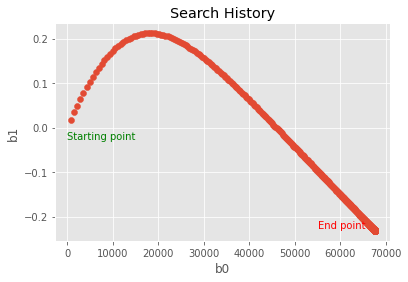

In [52]:
# plot the search history
x, y = np.array(hist).T
plt.scatter(x, y, )
plt.title("Search History")
plt.xlabel("b0")
plt.ylabel("b1")

plt.annotate("Starting point", xy =(0, -0.025), c = "green")
plt.annotate("End point", xy =(55000, -0.225), c = "red")

plt.show()

##### Task 3: Predict Selling Prices

In [53]:
# get b0 and b1 from the last entry of the search history
b0, b1 = hist[-1]

# Use the model to predict the selling prices for the specified driven distances
[round(b0 + b1*x,3) for x in [10000, 25000, 35000]]

[65295.557, 61811.875, 59489.421]

- The predicted selling price for 10000 km driven distance is 65295.558.
- The predicted selling price for 25000 km driven distance is 61811.876.
- The predicted selling price for 35000 km driven distance is 59489.422.

## Conclusion <a name="conclusion"></a>

The following tables compare the model parameters:

|    | Linear Regression  | Grid Search| Gradient Descent |
|---|---|---|---|
| $\beta_0$ | 67618.072| 67618.012| 67618.092 |
| $\beta_1$ | -0.232| -0.232| -0.232 |

<br>
Hence, we see that both Grid Search and Gradient Descent are robust algorithms for predicting the model parameters. If we want to make our codes more efficient, we can use them in a conditional loop or make them recursive functions. Furthermore, instead of having fixed grid sizes and learning rates, adjusting these hyperparameters in a dynamic way helps obtain convergent results more quickly.

However, Gradient Descent might not be always applicable because of its mathematical pre-requisite for a function to be continuous and differentiable. While Grid Search does not have such pre-requisite and can be used for wide range of cases, it is an exhaustive search algorithm and can be research limited for a complex situation, for example, a function with a large quantity of variables. In general, Gradient Descent is a disciplined mathematical operation to find the global minimum of a convex function, while grid search is an ad-hoc procedure that can lead to points around the optimal point depending on the selection of initial range. Building both algorithm from scratch really helps us get a deeper understanding about these two popular machine learning methods.